In [1]:
%matplotlib inline

import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

import QSTK.qstkutil.qsdateutil as du
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkutil.DataAccess as da

In [2]:
portfolios = np.loadtxt('tutorial3portfolio.csv', dtype='S5, f4',
                      delimiter=',', comments ='#', skiprows=1)
print(portfolios)

[('SPY',  0.30000001) ('GABBA',  0.2       ) ('GLD',  0.30000001)
 ('7ABBA',  0.2       )]


In [3]:
symbols = []
allocation = []
for portfolio in portfolios:
    symbols.append(portfolio[0])
    allocation.append(portfolio[1])

print(symbols)
print(allocation)

['SPY', 'GABBA', 'GLD', '7ABBA']
[0.30000001, 0.2, 0.30000001, 0.2]


In [4]:
dataobject = da.DataAccess('Yahoo')
all_syms = dataobject.get_all_symbols()
print(all_syms[:10])

['$DJI', '$SPX', '$VIX', 'A', 'AA', 'AAPL', 'ABC', 'ABI', 'ABKFQ', 'ABT']


In [5]:
bad_syms = list(set(symbols) - set(all_syms))
print(bad_syms)
for sym in bad_syms:
    idx = symbols.index(sym)
    symbols.pop(idx)
    allocation.pop(idx)

['7ABBA', 'GABBA']


In [6]:
end = dt.datetime(2011, 1, 1)
start = end - dt.timedelta(days=1095)
close_time = dt.timedelta(hours=16)
nyse_trading_days = du.getNYSEdays(start, end, close_time)
print(nyse_trading_days[:10])

[Timestamp('2008-01-02 16:00:00'), Timestamp('2008-01-03 16:00:00'), Timestamp('2008-01-04 16:00:00'), Timestamp('2008-01-07 16:00:00'), Timestamp('2008-01-08 16:00:00'), Timestamp('2008-01-09 16:00:00'), Timestamp('2008-01-10 16:00:00'), Timestamp('2008-01-11 16:00:00'), Timestamp('2008-01-14 16:00:00'), Timestamp('2008-01-15 16:00:00')]


In [7]:
# keys to read from data source
md_keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']

raw_market_data = dataobject.get_data(nyse_trading_days, symbols, md_keys)
market_data = dict(zip(md_keys, raw_market_data))
market_data

{'actual_close':                         SPY     GLD
 2008-01-02 16:00:00  144.93   84.86
 2008-01-03 16:00:00  144.86   85.57
 2008-01-04 16:00:00  141.31   85.13
 2008-01-07 16:00:00  141.19   84.77
 2008-01-08 16:00:00  138.91   86.78
 2008-01-09 16:00:00  140.37   86.55
 2008-01-10 16:00:00  141.29   88.25
 2008-01-11 16:00:00  140.15   88.58
 2008-01-14 16:00:00  141.28   89.54
 2008-01-15 16:00:00  138.17   87.99
 2008-01-16 16:00:00  136.98   86.70
 2008-01-17 16:00:00  133.43   86.50
 2008-01-18 16:00:00  132.06   87.42
 2008-01-22 16:00:00  130.72   88.17
 2008-01-23 16:00:00  133.86   87.89
 2008-01-24 16:00:00  134.99   90.08
 2008-01-25 16:00:00  133.04   90.30
 2008-01-28 16:00:00  135.24   91.75
 2008-01-29 16:00:00  135.91   91.15
 2008-01-30 16:00:00  134.91   92.06
 2008-01-31 16:00:00  137.37   91.40
 2008-02-01 16:00:00  139.58   89.35
 2008-02-04 16:00:00  137.82   89.10
 2008-02-05 16:00:00  134.13   87.68
 2008-02-06 16:00:00  133.05   88.95
 2008-02-07 16:00:00  

In [8]:
returns = market_data['close'].copy()
returns.head()

,SPY,GLD
2008-01-02 16:00:00,132.15,84.86
2008-01-03 16:00:00,132.09,85.57
2008-01-04 16:00:00,128.85,85.13
2008-01-07 16:00:00,128.74,84.77
2008-01-08 16:00:00,126.66,86.78


In [9]:
returns = returns.fillna(method='ffill')
returns = returns.fillna(method='bfill')
returns = returns.fillna(1.0)
returns.head()

,SPY,GLD
2008-01-02 16:00:00,132.15,84.86
2008-01-03 16:00:00,132.09,85.57
2008-01-04 16:00:00,128.85,85.13
2008-01-07 16:00:00,128.74,84.77
2008-01-08 16:00:00,126.66,86.78


In [10]:
na_returns = returns.values
tsu.returnize0(na_returns)
na_returns

array([[ 0.        ,  0.        ],
       [-0.00045403,  0.00836672],
       [-0.02452873, -0.00514199],
       ..., 
       [ 0.00073728,  0.00357091],
       [-0.00155534, -0.00493791],
       [ 0.00024596,  0.01233307]])

In [11]:
portfolio_returns = np.sum(na_returns * allocation, axis=1)
portfolio_total = np.cumprod(portfolio_returns + 1)
component_total = np.cumprod(na_returns + 1, axis=0)

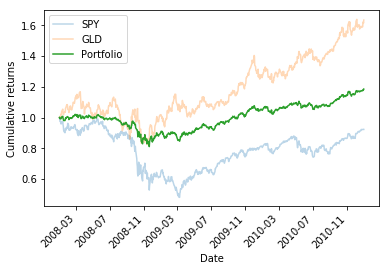

In [13]:
plt.clf()
fig = plt.figure()
fig.add_subplot(111)
plt.plot(nyse_trading_days, component_total, alpha=0.3)
plt.plot(nyse_trading_days, portfolio_total)
names = symbols
names.append('Portfolio')
plt.legend(names)
plt.ylabel('Cumulative returns')
plt.xlabel('Date')
fig.autofmt_xdate(rotation=45)